In [1]:
# %matplotlib inline
# %reload_ext autoreload

import sys
sys.path.append('../Class')
sys.path.append('../utils')

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss
from lineaire import Linear
from mltools import gen_arti, plot_frontiere, plot_data
from transformations import TanH, Sigmoid
from encapsulage import Sequential, Optim

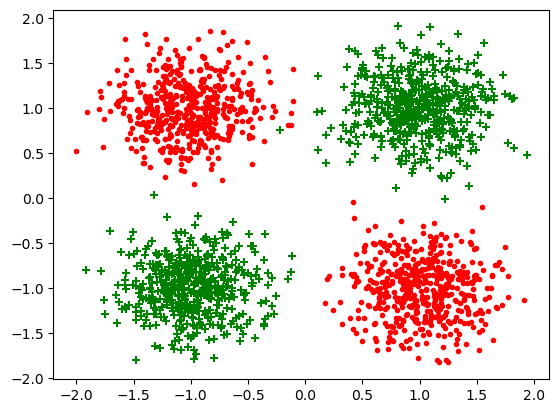

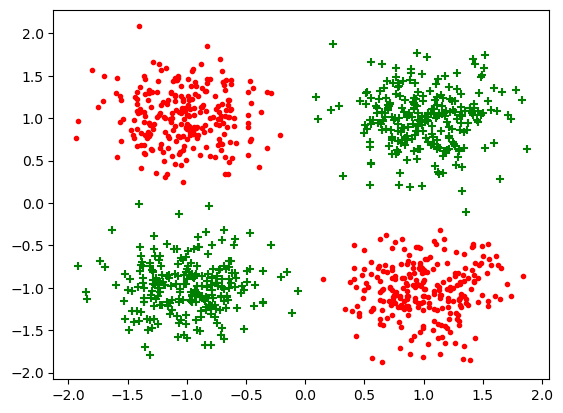

In [2]:
x_train, y_train = gen_arti(nbex=2000, data_type=1, epsilon=0.01)
y_train = np.where(y_train == -1, 0, 1).reshape(-1, 1)

x_test, y_test = gen_arti(nbex=1000, data_type=1, epsilon=0.01)
y_test = np.where(y_test == -1, 0, 1).reshape(-1, 1)

plot_data(x_train, y_train)
plt.show()

plot_data(x_test, y_test)
plt.show()

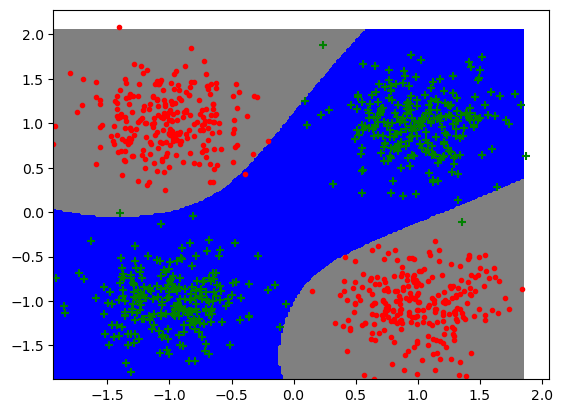

In [10]:
# Exemple d'utilisation avec le réseau à deux couches précédent
# Définition du réseau
hidden_size = 50
dim = 1
iter = 1000
input = x_train.shape[1]

network = Sequential(
    Linear(input, hidden_size),
    TanH(),
    Linear(hidden_size, dim),
    Sigmoid()
)
# Fonction de coût
loss_function = MSELoss()

# Hyperparamètres
batch_size = 64
num_iterations = 1000
learning_rate = 1e-3

# Optimiseur
optimizer = Optim(network, loss_function, learning_rate)
optimizer.sgd(x_train=x_train, y_train=y_train, batch_size=batch_size, epochs=num_iterations)

# Prédiction
def predict(x):
    return np.where(network.forward(x) > 0.5, 1, 0)

plot_frontiere(x_test, predict, step=200)
plot_data(x_test, y_test.reshape(-1))

